In [65]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

In [66]:
file_path = "datasets/DCASE2025T2/Development/ToyCar/train/section_00_source_train_normal_0000_car_D2_spd_40V_mic_1.wav"
amp, sr = librosa.load(file_path, sr=None)

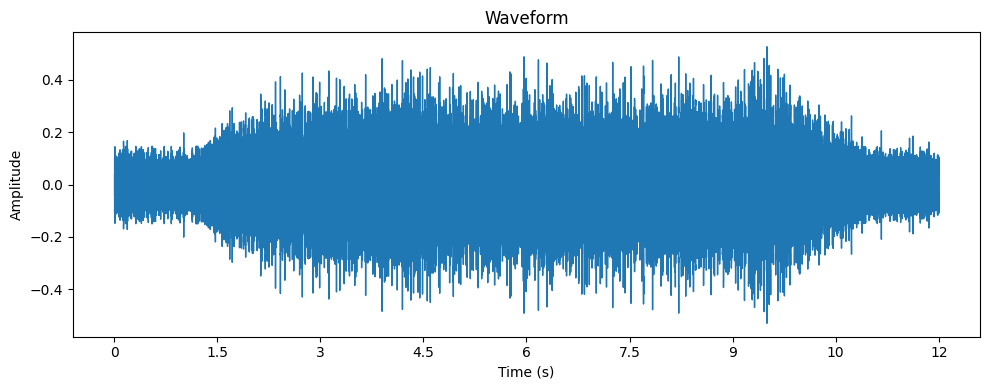

In [67]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(amp, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

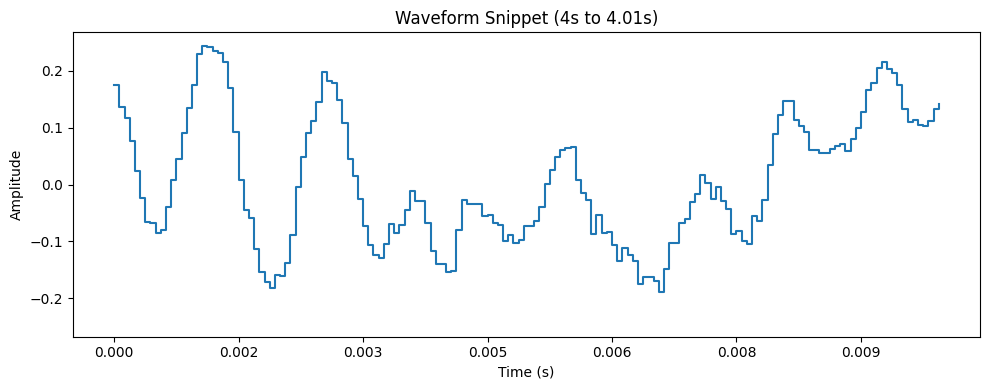

In [68]:
# Define the start and end times in seconds
start_time = 4  # Start at 5 seconds
end_time = 4.01   # End at 10 seconds

# Convert times to sample indices
start_sample = int(start_time * sr)
end_sample = int(end_time * sr)

# Slice the waveform to get the snippet
snippet = amp[start_sample:end_sample]

# Plot the snippet waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(snippet, sr=sr)
plt.title(f'Waveform Snippet ({start_time}s to {end_time}s)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

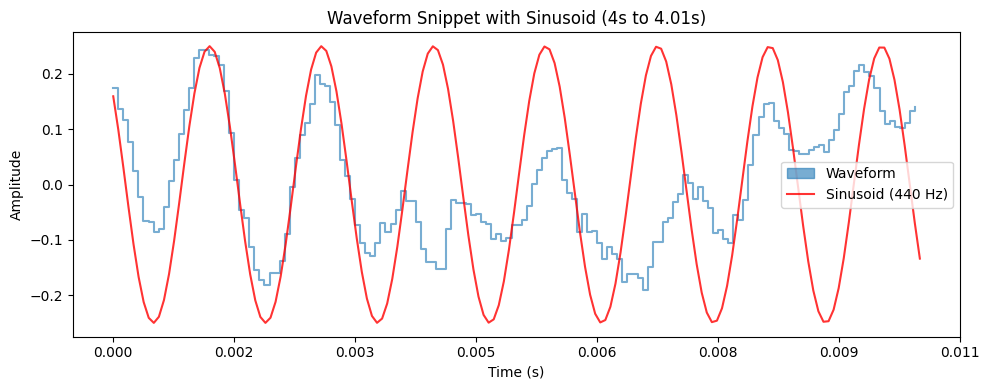

In [69]:
frequency = 720  # Frequency of the sinusoid in Hz
t = np.linspace(0, end_time-start_time, len(snippet))  # Time array
s_amp = 0.25
s_phase = 2.45
sinusoid = s_amp * np.sin(2 * np.pi * frequency * t + s_phase)  # Sinusoidal signal

# Plot the waveform snippet and sinusoid
plt.figure(figsize=(10, 4))
librosa.display.waveshow(snippet, sr=sr, alpha=0.6, label="Waveform")
plt.plot(t, sinusoid, color='red', alpha=0.8, label="Sinusoid (440 Hz)")
plt.title(f'Waveform Snippet with Sinusoid ({start_time}s to {end_time}s)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

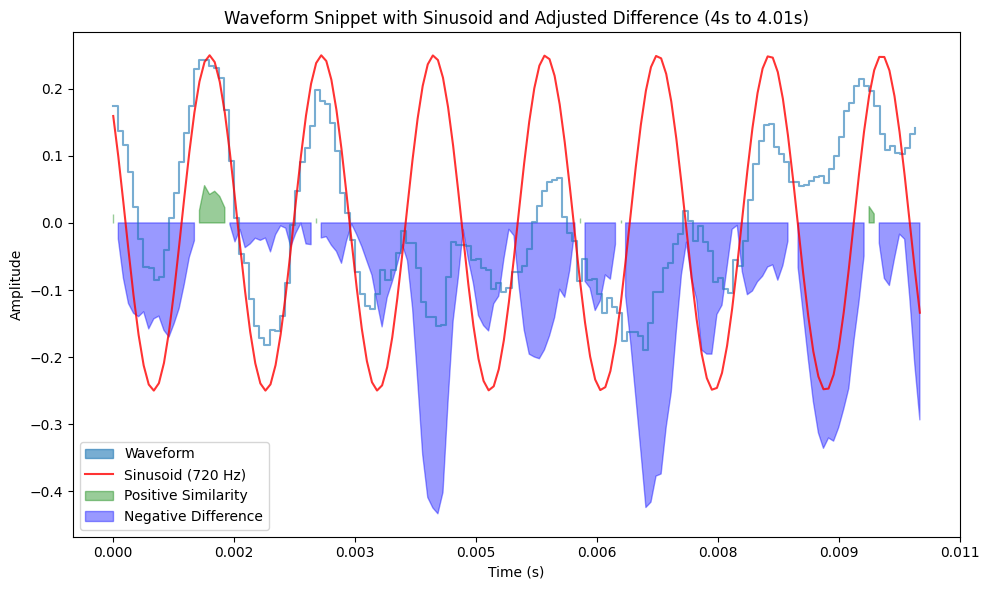

In [70]:
# Compute the similarity
similarity = snippet * sinusoid  # Element-wise product for similarity measure

# Compute the difference (residual magnitude)
difference = np.abs(snippet - sinusoid)  # Absolute difference

# Adjust the "difference" to be positive or negative based on similarity
adjusted_difference = similarity - difference

# Plot the waveform snippet, sinusoid, and the filled difference
plt.figure(figsize=(10, 6))

# Plot the waveform
librosa.display.waveshow(snippet, sr=sr, alpha=0.6, label="Waveform")

# Plot the sinusoid
plt.plot(t, sinusoid, color='red', alpha=0.8, label="Sinusoid (720 Hz)")

# Add a filled plot for the similarity/difference
plt.fill_between(t, 0, adjusted_difference, where=(adjusted_difference >= 0), 
                 color='green', alpha=0.4, label="Positive Similarity")
plt.fill_between(t, 0, adjusted_difference, where=(adjusted_difference < 0), 
                 color='blue', alpha=0.4, label="Negative Difference")

# Add labels and legend
plt.title(f'Waveform Snippet with Sinusoid and Adjusted Difference ({start_time}s to {end_time}s)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

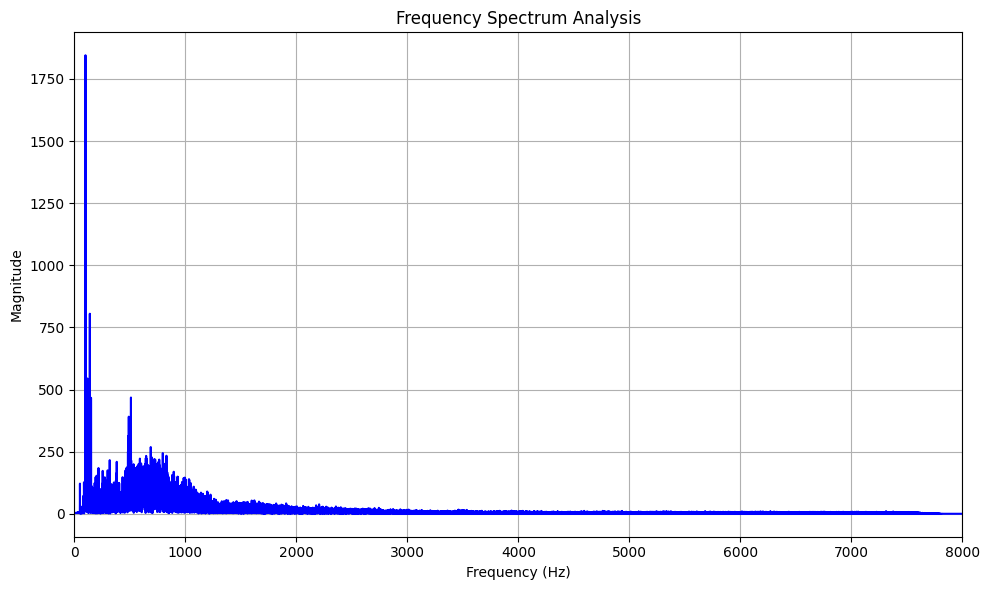

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Define the start and end times for the snippet (in seconds)
start_time = 5  # Start time in seconds
end_time = 10   # End time in seconds

# Convert times to sample indices
start_sample = int(start_time * sr)
end_sample = int(end_time * sr)

# Slice the waveform to get the snippet
snippet = amp[start_sample:end_sample]

# Perform the FFT on the snippet
fft_result = np.fft.fft(snippet)
frequencies = np.fft.fftfreq(len(fft_result), 1 / sr)

# Take the positive half of the spectrum
positive_frequencies = frequencies[:len(frequencies) // 2]
magnitude = np.abs(fft_result[:len(frequencies) // 2])

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies, magnitude, color='blue')
plt.title('Frequency Spectrum Analysis')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, sr / 2)  # Limit to the Nyquist frequency
plt.grid()
plt.tight_layout()
plt.show()

In [72]:
stft = librosa.stft(amp, n_fft=1024, hop_length=512)
stft = librosa.amplitude_to_db(abs(stft), ref=np.max)

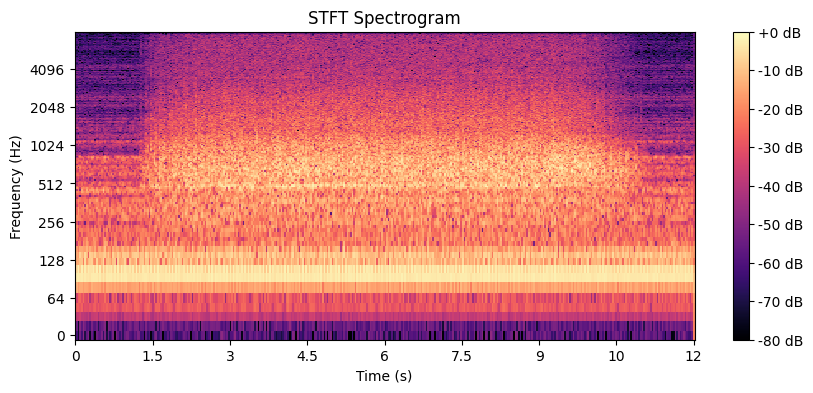

In [73]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [74]:
mel = librosa.feature.melspectrogram(
    y           = amp,
    sr          = sr,
    n_fft       = 1024,
    hop_length  = 512,
    n_mels      = 128
)
mel_db = librosa.power_to_db(mel, ref=np.max)

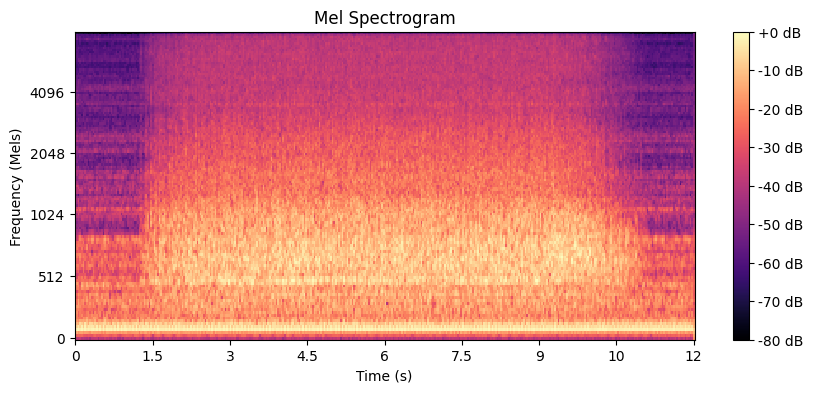

In [76]:
#> now plot the mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Mels)')
plt.show()